In [1]:
import VASPsol as vs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask
import os

# import the function for the Fermi-Dirac distribution
ef = vs.ef

# get the current working directory
os.getcwd()

'/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks'

In [2]:
client, cluster = ef.dask_workers(32, 6, 10, burst=False)
client

/home/ericfonseca/.local/lib/python3.10/site-packages/dask_jobqueue-0.8.1-py3.10.egg/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home/ericfonseca/.local/lib/python3.10/site-packages/dask_jobqueue-0.8.1-py3.10.egg/dask_jobqueue/slurm.py:49: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)


Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.13.55.10:8787/status,
Dashboard: http://10.13.55.10:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.13.55.10:38556,Workers: 0
Dashboard: http://10.13.55.10:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
# get all dirs with a "VAC" folder in them
root_dir = '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/'
dirs = [os.path.abspath(root_dir+i) for i in next(os.walk(root_dir))[1] if 'VAC' in os.listdir(root_dir+i)]
data_jobs = [client.submit(vs.data, i) for i in dirs]
len(data_jobs)

321

In [4]:
# get all folders in root_dir
dirs = [os.path.abspath(i) for i in next(os.walk('.'))[1]]
dirs

['/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/models',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/figures']

In [5]:
from dask.distributed import progress
progress(data_jobs)

VBox()

In [6]:
ml_df = pd.concat([i.result().ml_df for i in data_jobs])
ml_df['error'] = ml_df['error'].abs()
ml_df = ml_df[ml_df['error'] < 10]
ml_df

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.003000,0.642036,0.000772,-0.194341,-62.879039,2179,ethylformate,...,0.0,0.000,0.000,0.0,0.0,0.0,137.183,1.831503,0.079423,-0.691133
1,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.003660,0.581300,0.000936,-0.187315,-62.872013,2179,ethylformate,...,0.0,0.000,0.000,0.0,0.0,0.0,137.183,1.669484,0.072397,-0.629994
2,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.600000,0.000525,-0.177813,-62.862511,2179,ethylformate,...,0.0,0.000,0.000,0.0,0.0,0.0,137.183,1.450368,0.062895,-0.547309
3,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002750,0.660000,0.000472,-0.227300,-62.911998,2179,ethylformate,...,0.0,0.000,0.000,0.0,0.0,0.0,137.183,2.591538,0.112382,-0.977939
4,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.648200,0.000854,-0.185208,-62.869906,2179,ethylformate,...,0.0,0.000,0.000,0.0,0.0,0.0,137.183,1.620896,0.070290,-0.611659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,water,0142die,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.600000,0.000525,-0.051419,-77.307156,2228,diethylsulfide,...,0.0,25.165,0.061,0.0,0.0,0.0,172.471,0.244278,-0.010593,0.170824
0,water,0100met,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.003660,0.581300,0.000936,-0.125560,-129.028030,2187,methylhexanoate,...,0.0,0.000,0.000,0.0,0.0,0.0,233.686,0.405414,0.017581,-0.162817
1,water,0100met,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002500,0.600000,0.000525,-0.138300,-129.040770,2187,methylhexanoate,...,0.0,0.000,0.000,0.0,0.0,0.0,233.686,0.699198,0.030321,-0.280802
0,water,0010met,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.003660,0.581300,0.000936,0.067036,-73.528551,2101,2-methylpropane,...,0.0,0.000,0.000,0.0,0.0,0.0,143.412,0.774150,0.033571,0.333685


In [7]:
grouped_df = ml_df.groupby(['NC_K', 'SIGMA_K','TAU'])
# get only groups with at least 10 data points
grouped_df = grouped_df.filter(lambda x: len(x) > 10)
grouped_df = grouped_df.groupby(['NC_K', 'SIGMA_K','TAU'])
grouped_df = grouped_df.mean()
# include the count of data points in the group
grouped_df['count'] = ml_df.groupby(['NC_K', 'SIGMA_K','TAU']).count()['error']
grouped_df = grouped_df.reset_index()
grouped_df

/tmp/ipykernel_30747/2260228251.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = grouped_df.mean()


,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,Charge,Level1,Level2,Level3,...,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,count
0,0.002500,0.600000,0.000525,-0.120907,-79.148891,2220.932000,0.0,4.444000,2.340000,0.848000,...,3.055388,0.263200,0.0,0.725388,0.312784,165.952500,1.179053,0.001062,-0.038961,250
1,0.002750,0.660000,0.000472,-0.169862,-81.834564,2211.274882,0.0,4.004739,2.464455,0.966825,...,2.996616,0.311559,0.0,0.498777,0.370597,166.653005,1.506551,0.043645,-0.258845,211
2,0.002997,0.648200,0.000854,-0.118073,-86.869853,2209.400000,0.0,4.030769,2.507692,1.215385,...,3.579415,0.170077,0.0,1.215692,0.000000,176.140662,0.998660,-0.007506,2.004800,65
3,0.003000,0.642036,0.000772,-0.127350,-84.674760,2210.926966,0.0,3.955056,2.426966,1.011236,...,2.878584,0.181646,0.0,0.735489,0.233680,170.553685,1.118842,0.003082,-0.198540,178
4,0.003087,0.591554,0.000790,-0.139768,-93.893031,2201.000000,0.0,3.555556,2.333333,1.666667,...,1.921222,0.000000,0.0,1.374278,0.000000,181.261222,1.143174,-0.026103,8.996397,18
5,0.003660,0.581300,0.000936,-0.116438,-81.996421,2214.160870,0.0,4.147826,2.452174,0.926087,...,3.275357,0.286100,0.0,0.750530,0.339983,168.009948,1.120684,-0.007910,-0.207903,230


In [8]:
# compute the % increase in performance for each group
grouped_df['% increase'] = (grouped_df['error'] - grouped_df['error'].min()) / grouped_df['error'].min() * 100
grouped_df

,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,Charge,Level1,Level2,Level3,...,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,count,% increase
0,0.002500,0.600000,0.000525,-0.120907,-79.148891,2220.932000,0.0,4.444000,2.340000,0.848000,...,0.263200,0.0,0.725388,0.312784,165.952500,1.179053,0.001062,-0.038961,250,18.063503
1,0.002750,0.660000,0.000472,-0.169862,-81.834564,2211.274882,0.0,4.004739,2.464455,0.966825,...,0.311559,0.0,0.498777,0.370597,166.653005,1.506551,0.043645,-0.258845,211,50.857150
2,0.002997,0.648200,0.000854,-0.118073,-86.869853,2209.400000,0.0,4.030769,2.507692,1.215385,...,0.170077,0.0,1.215692,0.000000,176.140662,0.998660,-0.007506,2.004800,65,0.000000
3,0.003000,0.642036,0.000772,-0.127350,-84.674760,2210.926966,0.0,3.955056,2.426966,1.011236,...,0.181646,0.0,0.735489,0.233680,170.553685,1.118842,0.003082,-0.198540,178,12.034270
4,0.003087,0.591554,0.000790,-0.139768,-93.893031,2201.000000,0.0,3.555556,2.333333,1.666667,...,0.000000,0.0,1.374278,0.000000,181.261222,1.143174,-0.026103,8.996397,18,14.470709
5,0.003660,0.581300,0.000936,-0.116438,-81.996421,2214.160870,0.0,4.147826,2.452174,0.926087,...,0.286100,0.0,0.750530,0.339983,168.009948,1.120684,-0.007910,-0.207903,230,12.218714


In [9]:
# parameters from optimizer
#NC_K_opt = 0.002750
#SIGMA_K_opt = 0.660000
#TAU_opt = 0.000472
# NC_K_opt = 3.66e-3
# SIGMA_K_opt = 0.5813
# TAU_opt =9.363e-4
    
NC_K_opt = 2.997e-03
SIGMA_K_opt = 6.482e-01
TAU_opt = 8.541e-04
# new NC_K_opt, etc = 0.00308742, 0.59155393, 0.00079023
# NC_K_opt = 0.00308742
# SIGMA_K_opt = 0.59155393
# TAU_opt = 0.00079023
NC_K_default = 0.0025
SIGMA_K_default = 0.6
TAU_default = 0.000525

In [10]:
default_df = ml_df[(ml_df['NC_K'] == NC_K_default) & (ml_df['SIGMA_K'] == SIGMA_K_default) & (ml_df['TAU'] == TAU_default)]
default_df['error'] = default_df['error'].abs()
default_df['error'].mean(), len(default_df)

/tmp/ipykernel_30747/765186932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_df['error'] = default_df['error'].abs()


(1.1790533854799914, 250)

In [11]:
# get existing data that was ran with the above parameters
ran_df = ml_df[(ml_df['NC_K'] == NC_K_opt) & (ml_df['SIGMA_K'] == SIGMA_K_opt) & (ml_df['TAU'] == TAU_opt)]
ran_df = ran_df[ran_df['FileHandle'].isin(default_df['FileHandle'])]
ran_df = ran_df.dropna()
ran_df = ran_df.reset_index(drop=True)
ran_df['error'] = ran_df['error'].abs()
ran_df = ran_df[ran_df['error'] < 10]
ran_df

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0092ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.185208,-62.869906,2179,ethylformate,...,0.0,0.0,0.0,0.0,0.0,0.0,137.183,1.620896,0.070290,-0.611659
1,water,0145pro,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.211263,-55.240561,2231,allylalcohol,...,0.0,0.0,0.0,0.0,0.0,0.0,125.517,0.208275,-0.009032,0.040999
2,water,0238met,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.106980,-162.058560,2302,methyloctanoate,...,0.0,0.0,0.0,0.0,0.0,0.0,282.436,0.426959,0.018515,-0.209294
3,water,0007nhe,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,0.100220,-123.065360,2099,n-heptane,...,0.0,0.0,0.0,0.0,0.0,0.0,219.446,0.308927,0.013397,0.117911
4,water,0067but,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.042391,-96.250559,2155,t-butylmethylether,...,0.0,0.0,0.0,0.0,0.0,0.0,171.704,1.232464,-0.053446,0.557676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,water,0234ENmb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.359487,-68.626795,2298,E-N-methylacetamide,...,0.0,0.0,0.0,0.0,0.0,0.0,139.282,1.710230,-0.074164,0.171023
60,water,0034hex,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.066902,-89.443607,2124,1-hexyne,...,0.0,0.0,0.0,0.0,0.0,0.0,179.158,1.832760,0.079478,6.319862
61,water,0046eth,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.370439,-53.646944,2135,"1,2-ethanediol",...,0.0,0.0,0.0,0.0,0.0,0.0,120.061,0.757677,-0.032857,0.081471
62,water,0078pen,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.155628,-89.150489,2165,2-pentanone,...,0.0,0.0,0.0,0.0,0.0,0.0,172.595,0.058782,0.002549,-0.016652


In [12]:
# get the mean absolute error for ran_df 
error = ran_df['error'].mean()
print(error)
# sort by the error
sorted_df = ran_df.sort_values(by=['error'], ascending=False)
sorted_df

0.9833998390624714


,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
32,water,0437pho,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.475180,-164.834990,2338,methyl3-methyl-4-thiomethoxyphenylthiophosphate,...,25.083,61.708,0.696,0.0,27.228,0.0,316.110,4.037651,0.175093,-0.583476
6,water,0115dip,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.025150,-118.089900,2201,dipropylamine,...,0.000,0.000,0.000,0.0,0.000,0.0,206.386,3.080041,-0.133566,0.841541
33,water,0107tri,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.014743,-68.313071,2193,trimethylamine,...,0.000,0.000,0.000,0.0,0.000,0.0,135.848,2.890026,-0.125326,0.894745
42,water,0066dim,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.100782,-85.609404,2154,"1,2-dimethoxyethane",...,0.000,0.000,0.000,0.0,0.000,0.0,172.971,2.515967,-0.109105,0.519828
15,water,0042ant,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.077250,-163.089940,2132,anthracene,...,0.000,0.000,0.000,0.0,0.000,0.0,246.703,2.448615,-0.106185,0.578869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,water,0137ethb,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.061783,-44.285428,2223,ethanethiol,...,0.000,33.976,10.355,0.0,0.000,0.0,122.671,0.124716,0.005408,-0.095935
30,water,0213bis,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.164772,-74.383800,2281,bis(2-chloroethyl)sulfide,...,0.000,25.246,0.004,0.0,0.000,0.0,210.862,0.120358,-0.005219,0.030703
62,water,0078pen,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.155628,-89.150489,2165,2-pentanone,...,0.000,0.000,0.000,0.0,0.000,0.0,172.595,0.058782,0.002549,-0.016652
34,water,0079pen,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.002997,0.6482,0.000854,-0.149717,-89.197045,2166,3-pentanone,...,0.000,0.000,0.000,0.0,0.000,0.0,171.504,0.042474,0.001842,-0.012456


In [13]:
def solv_calc(file, nc, sig, tau):
    # This is where you can change the solvent that is being run~!!!
    return vs.calculate_solvent(file, NSW=0, solvent='water', dict_of_additional_tags={'NC_K':nc, 'SIGMA_K':sig, 'TAU':tau})


In [14]:
ran_files = [os.path.abspath(i) for i in sorted_df['FileHandle']]
ran_files

['/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0437pho',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0115dip',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0107tri',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0066dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0042ant',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0125dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0571dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0401amia',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0032but',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0034hex',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0110but',
 '/blue/hennig/ericf

In [15]:
files_to_run = [i for i in dirs if i not in ran_files]
# we are going to use rejection sampling to get 20 random files to run
# we will use the error as the probability of being selected
def rejection_sampling(vector, samples=100):
    indicies = np.arange(len(vector))
    # fit a gaussian kernel to the data
    from sklearn.neighbors import KernelDensity
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(vector.reshape(-1, 1))
    # create a vector of each points probability
    logprob = kde.score_samples(vector.reshape(-1, 1))
    p = np.exp(logprob)
    # normalize the probabilities
    p = p / p.sum()

    output = []
    for sample in range(samples):
        # use the probability to sample the data
        sample = np.random.choice(indicies, p=p)
        # add the sample to the vector
        output.append(sample)
    return output
# use the df to get the error and find the corresponding run files

# UNCOMMENT LATER
# error = sorted_df['error'].values
# # get the indicies of the files to run
# indicies = rejection_sampling(error, samples=20)
# # get the files to run
# fnames_to_run = sorted_df['FileHandle'].iloc[indicies].values
# #print(len(fnames_to_run), fnames_to_run)
# # get the full path to the files
# files_to_run = [os.path.abspath(i) for i in fnames_to_run]

files_to_run = ['/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0036tol', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0221tri', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0046eth', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0029hex', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0176pdi', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0033pen', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0176pdi', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0234ENmb', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0571dim', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0401amia', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0071proa', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0063die', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0050met', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0078pen', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0093met', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0110but', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0068ani', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0076but', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0034hex', 
                '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0438pho']
fnames_to_run = [os.path.basename(i) for i in files_to_run]
print(len(files_to_run), files_to_run, fnames_to_run)

20 ['/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0036tol', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0221tri', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0046eth', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0029hex', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0176pdi', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0033pen', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0176pdi', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0234ENmb', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0571dim', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/0401amia', '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/calculations/007

In [16]:
ml_df[(ml_df['FileHandle'].isin(fnames_to_run))].groupby(['NC_K','SIGMA_K','TAU']).mean()


/tmp/ipykernel_30747/1507153532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ml_df[(ml_df['FileHandle'].isin(fnames_to_run))].groupby(['NC_K','SIGMA_K','TAU']).mean()


,,,Solvation_Energy,Total_Energy,No.,Charge,Level1,Level2,Level3,DeltaGsolv,eps,n,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
NC_K,SIGMA_K,TAU,,,,,,,,,,,,,,,,,,,,,
0.002500,0.600000,0.000525,-0.151376,-91.898562,2198.736842,0.0,3.473684,2.421053,1.631579,-3.804737,78.36,1.3328,...,2.691474,1.820105,0.0,0.0,1.301947,0.0,178.262684,1.045805,-0.013617,10.093717
0.002750,0.660000,0.000472,-0.206204,-93.959467,2201.000000,0.0,3.555556,2.333333,1.666667,-3.825000,78.36,1.3328,...,2.841000,1.921222,0.0,0.0,1.374278,0.0,181.261222,1.228921,0.040333,15.926095
0.002997,0.648200,0.000854,-0.149099,-91.896285,2198.736842,0.0,3.473684,2.421053,1.631579,-3.804737,78.36,1.3328,...,2.691474,1.820105,0.0,0.0,1.301947,0.0,178.262684,0.973212,-0.015894,9.171092
0.003000,0.642036,0.000772,-0.161197,-93.914460,2201.000000,0.0,3.555556,2.333333,1.666667,-3.825000,78.36,1.3328,...,2.841000,1.921222,0.0,0.0,1.374278,0.0,181.261222,0.922263,-0.004674,11.033503
0.003087,0.591554,0.000790,-0.139768,-93.893031,2201.000000,0.0,3.555556,2.333333,1.666667,-3.825000,78.36,1.3328,...,2.841000,1.921222,0.0,0.0,1.374278,0.0,181.261222,1.143174,-0.026103,8.996397
0.003660,0.581300,0.000936,-0.148650,-93.901913,2201.000000,0.0,3.555556,2.333333,1.666667,-3.825000,78.36,1.3328,...,2.841000,1.921222,0.0,0.0,1.374278,0.0,181.261222,1.007832,-0.017222,9.567164


In [17]:
jobs = [client.submit(solv_calc, os.path.abspath('../calculations/'+i), NC_K_opt, SIGMA_K_opt, TAU_opt) for i in ml_df['FileHandle'].unique()]


In [31]:
jobs = [client.submit(solv_calc, os.path.abspath('../calculations/'+i.split('/')[-1]), NC_K_opt, SIGMA_K_opt, TAU_opt) for i in ran_files]

In [30]:
ran_files

['/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0437pho',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0115dip',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0107tri',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0066dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0042ant',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0125dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0203bro',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0571dim',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0401amia',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0032but',
 '/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/notebooks/0034hex',
 '/blue/hennig/ericf

In [18]:
from dask.distributed import progress
progress(jobs)

VBox()

In [33]:
# cancel all the jobs
for job in jobs:
    job.cancel()

In [ ]:
data = [vs.data(i) for i in dirs]
data

/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0092ethb/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00366_SIGMA_K_0.5813_TAU_0.0009363
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0092ethb/Solvent_water_epsilon_78.4_Ionic_0_calc_linear
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0092ethb/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00275_SIGMA_K_0.66_TAU_0.000472
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0145pro/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00366_SIGMA_K_0.5813_TAU_0.0009363
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0145pro/Solvent_water_epsilon_78.4_Ionic_0_calc_linear
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0145pro/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00275_SIGMA_K_0.66_TAU_0.000472
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0577hyd/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00366_SIGMA_K_0.

KeyboardInterrupt: 

In [ ]:
run_data = [vs.data(i) for i in files_to_run]
run_df = pd.concat([i.ml_df for i in run_data])
run_df

/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0036tol/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.003_SIGMA_K_0.64203644_TAU_0.0007722
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0036tol/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00366_SIGMA_K_0.5813_TAU_0.0009363
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0036tol/Solvent_water_epsilon_78.4_Ionic_0_calc_linear
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0036tol/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00275_SIGMA_K_0.66_TAU_0.000472
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0221tri/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.003_SIGMA_K_0.64203644_TAU_0.0007722
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0221tri/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.00366_SIGMA_K_0.5813_TAU_0.0009363
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/EMA/0221tri/Solvent_water_epsilon_78

,Solvent,FileHandle,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,Formula,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0036tol,0.00300,0.642036,0.000772,-0.032732,-92.665123,2126,toluene,H8C7,...,0.000,0.000,0.0,0.0,0.000,0.0,166.450,-0.135200,-0.005863,0.151910
1,water,0036tol,0.00366,0.581300,0.000936,-0.017299,-92.649690,2126,toluene,H8C7,...,0.000,0.000,0.0,0.0,0.000,0.0,166.450,-0.491085,-0.021296,0.551781
2,water,0036tol,0.00250,0.600000,0.000525,-0.039232,-92.671623,2126,toluene,H8C7,...,0.000,0.000,0.0,0.0,0.000,0.0,166.450,0.014690,0.000637,-0.016506
3,water,0036tol,0.00275,0.660000,0.000472,-0.077009,-92.709400,2126,toluene,H8C7,...,0.000,0.000,0.0,0.0,0.000,0.0,166.450,0.885828,0.038414,-0.995312
0,water,0221tri,0.00300,0.642036,0.000772,-0.308750,-144.805400,2289,triethylphosphate,H15C6O4P1,...,35.105,0.000,0.0,0.0,0.000,0.0,272.981,-0.680225,-0.029498,0.087208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,water,0034hex,0.00275,0.660000,0.000472,-0.125887,-89.502592,2124,1-hexyne,H10C6,...,0.000,0.000,0.0,0.0,0.000,0.0,179.158,3.192954,0.138463,11.010187
0,water,0438pho,0.00300,0.642036,0.000772,-0.158660,-173.866310,2339,"diethyl2,4-dichlorophenylthiophosphate",H13C10O3P1S1CL2,...,16.033,34.582,0.0,0.0,24.737,0.0,331.933,-0.201300,-0.008729,0.052150
1,water,0438pho,0.00366,0.581300,0.000936,-0.129860,-173.837510,2339,"diethyl2,4-dichlorophenylthiophosphate",H13C10O3P1S1CL2,...,16.033,34.582,0.0,0.0,24.737,0.0,331.933,-0.865428,-0.037529,0.224204
2,water,0438pho,0.00250,0.600000,0.000525,-0.155720,-173.863370,2339,"diethyl2,4-dichlorophenylthiophosphate",H13C10O3P1S1CL2,...,16.033,34.582,0.0,0.0,24.737,0.0,331.933,-0.269097,-0.011669,0.069714


In [ ]:
# group by vaspsol parameters
run_df['error'] = run_df['error'].abs()
grouped_runs = run_df.groupby(['NC_K', 'SIGMA_K', 'TAU'])
# mean error
mean_error = grouped_runs['error'].mean()
mean_error

NC_K     SIGMA_K   TAU     
0.00250  0.600000  0.000525    1.006504
0.00275  0.660000  0.000472    4.614736
0.00300  0.642036  0.000772    7.896860
0.00366  0.581300  0.000936    0.968037
Name: error, dtype: float64

In [ ]:
#ml_df = pd.concat([i.ml_df for i in data])
ml_df = ml_df[(ml_df['NC_K'] == NC_K_opt) & (ml_df['SIGMA_K'] == SIGMA_K_opt) & (ml_df['TAU'] == TAU_opt)]
ml_df = ml_df.dropna()
ml_df = ml_df.reset_index(drop=True)
ml_df['error'] = ml_df['error'].abs()
ml_df = ml_df[ml_df['error'] < 10]
ml_df

,Solvent,FileHandle,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,Formula,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0092ethb,0.00366,0.5813,0.000936,-0.187315,-62.872013,2179,ethylformate,H6C3O2,...,0.000,0.000,0.000,0.0,0.000,0.0,137.183,1.669484,0.072397,-0.629994
1,water,0145pro,0.00366,0.5813,0.000936,-0.216539,-55.245837,2231,allylalcohol,H6C3O1,...,0.000,0.000,0.000,0.0,0.000,0.0,125.517,0.086611,-0.003756,0.017049
2,water,0238met,0.00366,0.5813,0.000936,-0.102640,-162.054220,2302,methyloctanoate,H18C9O2,...,0.000,0.000,0.000,0.0,0.000,0.0,282.436,0.326878,0.014175,-0.160235
3,water,0007nhe,0.00366,0.5813,0.000936,0.108320,-123.057260,2099,n-heptane,H16C7,...,0.000,0.000,0.000,0.0,0.000,0.0,219.446,0.122141,0.005297,0.046619
4,water,0067but,0.00366,0.5813,0.000936,-0.040147,-96.248315,2155,t-butylmethylether,H12C5O1,...,0.000,0.000,0.000,0.0,0.000,0.0,171.704,1.284210,-0.055690,0.581091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,water,0217wat,0.00366,0.5813,0.000936,-0.369813,-14.588300,2285,water,H2O1,...,0.000,0.000,0.000,0.0,0.000,0.0,55.683,2.217888,0.096179,-0.351488
254,water,0449pho,0.00366,0.5813,0.000936,-0.325390,-218.380380,2346,ethyl4-cyanophenylphenylthiophosphonate,H14C15N1O2P1S1,...,10.036,33.954,0.000,0.0,24.211,0.0,378.215,2.403493,0.104228,-0.471273
255,water,0142die,0.00366,0.5813,0.000936,-0.031994,-77.287731,2228,diethylsulfide,H10C4S1,...,0.000,25.165,0.061,0.0,0.000,0.0,172.471,0.692218,-0.030018,0.484069
256,water,0100met,0.00366,0.5813,0.000936,-0.125560,-129.028030,2187,methylhexanoate,H14C7O2,...,0.000,0.000,0.000,0.0,0.000,0.0,233.686,0.405414,0.017581,-0.162817


array([[<AxesSubplot: title={'center': 'error'}>]], dtype=object)

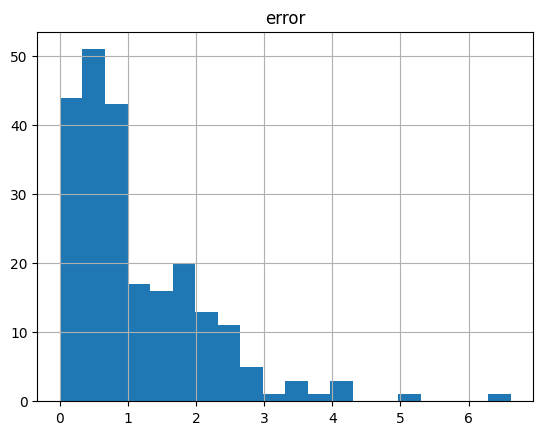

In [ ]:
ml_df.hist('error', bins=20)

In [ ]:
mean_error = ml_df['error'].mean()
mean_error, 

(1.2718626408009779,)

In [ ]:
names = ['n-octane','ethanol','nitromethane','phenol','toluene','1,4-dioxane','acetone','aceticacid','2-butanone']

In [ ]:
df2 = ml_df[ml_df['SoluteName'].isin(names)]
df2

,Solvent,FileHandle,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,Formula,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
45,water,0075pro,0.00275,0.66,0.000472,-0.234086,-56.180666,2162,acetone,H6C3O1,...,0.0,0.0,0.0,0.0,0.0,0.0,124.665,1.548023,0.067130,-0.402084
72,water,0008noc,0.00275,0.66,0.000472,0.029960,-139.629550,2100,n-octane,H18C8,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,2.199122,0.095365,0.760942
100,water,0076but,0.00275,0.66,0.000472,-0.213795,-72.692339,2163,2-butanone,H8C4O1,...,0.0,0.0,0.0,0.0,0.0,0.0,148.104,1.290113,0.055946,-0.354427
113,water,0062dio,0.00275,0.66,0.000472,-0.206047,-78.402576,2150,"1,4-dioxane",H8C4O2,...,0.0,0.0,0.0,0.0,0.0,0.0,146.316,0.298556,-0.012947,0.059120
114,water,0045eth,0.00275,0.66,0.000472,-0.230116,-47.124216,2134,ethanol,H6C2O1,...,0.0,0.0,0.0,0.0,0.0,0.0,110.185,0.296475,0.012857,-0.059177
153,water,0086eth,0.00275,0.66,0.000472,-0.378344,-47.082772,2173,aceticacid,H4C2O2,...,0.0,0.0,0.0,0.0,0.0,0.0,111.870,2.024613,0.087798,-0.302181


In [ ]:
df2['error'].mean()

1.276150339999955

In [ ]:
client

<Client: 'tcp://10.13.55.17:33187' processes=5 threads=5, memory=596.05 GiB>